In [1]:
#A_ch02_101_DecisionTreeRegressor.ipynb
#以decision tree 做迴歸--DecisionTreeRegressor
#以記憶體價格資料 ram_prices.csv 為例

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mglearn

In [3]:
#step 0. 讀取資料
ram_prices=pd.read_csv("ram_price.csv")

In [4]:
#step 0.1 檢視資料 DataFrame 'ram_prices'
ram_prices

,Unnamed: 0,date,price
0,0,1957.00,4.110418e+08
1,1,1959.00,6.794772e+07
2,2,1960.00,5.242880e+06
3,3,1965.00,2.642412e+06
4,4,1970.00,7.340030e+05
5,5,1973.00,3.993600e+05
6,6,1974.00,3.145730e+05
7,7,1975.00,4.218880e+05
8,8,1975.08,1.802240e+05
9,9,1975.25,6.758400e+04


In [7]:
#reset index use 'date'
ram_prices=ram_prices.set_index('date')

In [8]:
%matplotlib inline

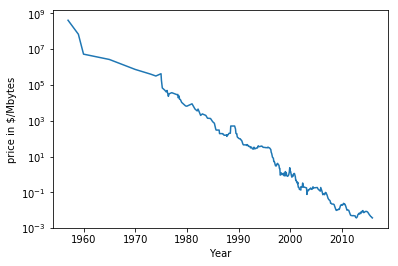

In [9]:
ax=ram_prices['price'].plot(logy=True) #y軸以對數尺度 logy=True
ax.set_ylabel("price in $/Mbytes")
ax.set_xlabel("Year")

In [10]:
#=============================================================
# 目標--> 以2000年以前的資料對2000年後做預測
# 特徵--> 日期是唯一的特徵
# 模型--> 比較 DecisionTreeRegressor 與 LinearRegression
# 前置處理 --> 用對數重新調整價格，讓關係變為線性
#             並在訓練及預測後，使用指數映射來撤銷對數轉換

In [11]:
#DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor

In [28]:
#擷取2000前資料作為 train data
data_train=ram_prices.loc[:2000]

In [29]:
#擷取2000後資料作為 test data
data_test=ram_prices.loc[2000.08:]

In [39]:
from pandas import DataFrame

In [43]:
#以
X_train=DataFrame(data_train.index).date[:,np.newaxis]

In [45]:
X_train

array([[ 1957.  ],
       [ 1959.  ],
       [ 1960.  ],
       [ 1965.  ],
       [ 1970.  ],
       [ 1973.  ],
       [ 1974.  ],
       [ 1975.  ],
       [ 1975.08],
       [ 1975.25],
       [ 1975.75],
       [ 1976.  ],
       [ 1976.17],
       [ 1976.42],
       [ 1976.58],
       [ 1977.08],
       [ 1978.17],
       [ 1978.25],
       [ 1978.33],
       [ 1978.5 ],
       [ 1978.58],
       [ 1978.75],
       [ 1979.  ],
       [ 1979.75],
       [ 1980.  ],
       [ 1981.  ],
       [ 1981.58],
       [ 1982.  ],
       [ 1982.17],
       [ 1982.67],
       [ 1983.  ],
       [ 1983.67],
       [ 1984.  ],
       [ 1984.58],
       [ 1985.  ],
       [ 1985.33],
       [ 1985.42],
       [ 1985.5 ],
       [ 1985.58],
       [ 1985.67],
       [ 1985.83],
       [ 1985.92],
       [ 1986.  ],
       [ 1986.08],
       [ 1986.17],
       [ 1986.25],
       [ 1986.33],
       [ 1986.42],
       [ 1986.5 ],
       [ 1986.58],
       [ 1986.67],
       [ 1986.75],
       [ 198

In [31]:
X_train

Float64Index([ 1957.0,  1959.0,  1960.0,  1965.0,  1970.0,  1973.0,  1974.0,
               1975.0, 1975.08, 1975.25,
              ...
              1999.13, 1999.17, 1999.25, 1999.33,  1999.5, 1999.67, 1999.75,
              1999.83, 1999.92,  2000.0],
             dtype='float64', name='date', length=203)

In [32]:
y_train=np.log(data_train.price)

In [33]:
y_train

date
1957.00    19.834205
1959.00    18.034249
1960.00    15.472382
1965.00    14.787203
1970.00    13.506268
1973.00    12.897619
1974.00    12.658971
1975.00    12.952495
1975.08    12.101956
1975.25    11.121127
1975.75    10.818177
1976.00    10.614082
1976.17    10.798759
1976.42    10.044987
1976.58    10.373491
1977.08    10.513253
1978.17    10.239960
1978.25    10.290110
1978.33     9.862666
1978.50    10.085809
1978.58     9.680344
1978.75     9.629051
1979.00     9.261794
1979.75     8.810460
1980.00     8.776476
1981.00     9.082507
1981.58     8.407155
1982.00     8.166216
1982.17     8.403801
1982.67     7.590852
             ...    
1997.33     1.098612
1997.42     1.305626
1997.50     1.386294
1997.58     1.418277
1997.67     1.289233
1997.75     1.226712
1997.83     1.178655
1997.92     0.770108
1998.00     0.770108
1998.08    -0.094311
1998.17    -0.030459
1998.25     0.198851
1998.33     0.173953
1998.42    -0.030459
1998.58     0.029559
1998.67    -0.030459
1998.75 